# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
# Explore your DataFrame `aqi`.

### YOUR CODE HERE ###


In [4]:
aqi.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
aqi.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


In [6]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


In [7]:
aqi.nunique()

Unnamed: 0          260
date_local            1
state_name           52
county_name         149
city_name           190
local_site_name     253
parameter_name        1
units_of_measure      1
arithmetic_mean     150
aqi                  29
dtype: int64

**Question:** What time range does this data cover?

ZY: Only 1 date on 2018-01-01

**Question:** What are the minimum and maximum AQI values observed in the dataset?

ZY: Min = 0, max = 50

**Question:** Are all states equally represented in the dataset?

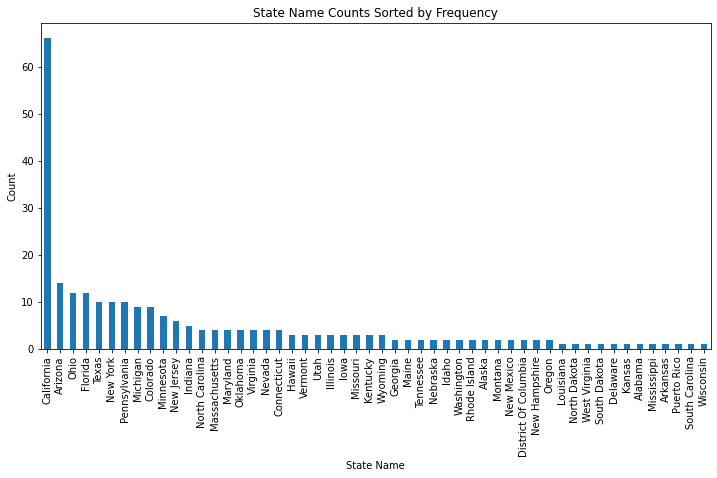

In [8]:
#ZY
# Calculate the counts for each category
state_counts = aqi['state_name'].value_counts()

# Sort the counts in descending order
sorted_state_counts = state_counts.sort_values(ascending=False)

# Plot the sorted histogram
plt.figure(figsize=(12, 6))
sorted_state_counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Count')
plt.title('State Name Counts Sorted by Frequency')
plt.show()

In [9]:
#ZY
aqi['state_name'].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

ZY: As evident from the bar chart plotted using statename, california accounts for a big portion of the data, having a frequency of 66.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [10]:
# Summarize the mean AQI for RRE states.

### YOUR CODE HERE ###

# Create a list of RRE states.
RRE_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
RRE_aqi = pd.DataFrame()
for state in RRE_states:
    RRE_aqi = RRE_aqi.append(aqi[aqi['state_name']==state],ignore_index=True)

# Find the mean aqi for each of the RRE states.
RRE_aqi.groupby(['state_name'])['aqi'].mean()

state_name
California      12.121212
Florida          5.500000
Michigan         8.111111
Ohio             3.333333
Pennsylvania     2.900000
Texas            2.700000
Name: aqi, dtype: float64

In [11]:
# From hints
RRE_aqi = aqi[aqi['state_name'].isin(RRE_states)]
RRE_aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
12,12,2018-01-01,Ohio,Hamilton,Cincinnati,Taft NCore,Carbon monoxide,Parts per million,0.252632,3
16,16,2018-01-01,California,San Bernardino,Ontario,Ontario Near Road (Etiwanda),Carbon monoxide,Parts per million,0.747368,11


In [12]:
# From hints 
RRE_aqi.groupby(['state_name'])['aqi'].mean()

state_name
California      12.121212
Florida          5.500000
Michigan         8.111111
Ohio             3.333333
Pennsylvania     2.900000
Texas            2.700000
Name: aqi, dtype: float64

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

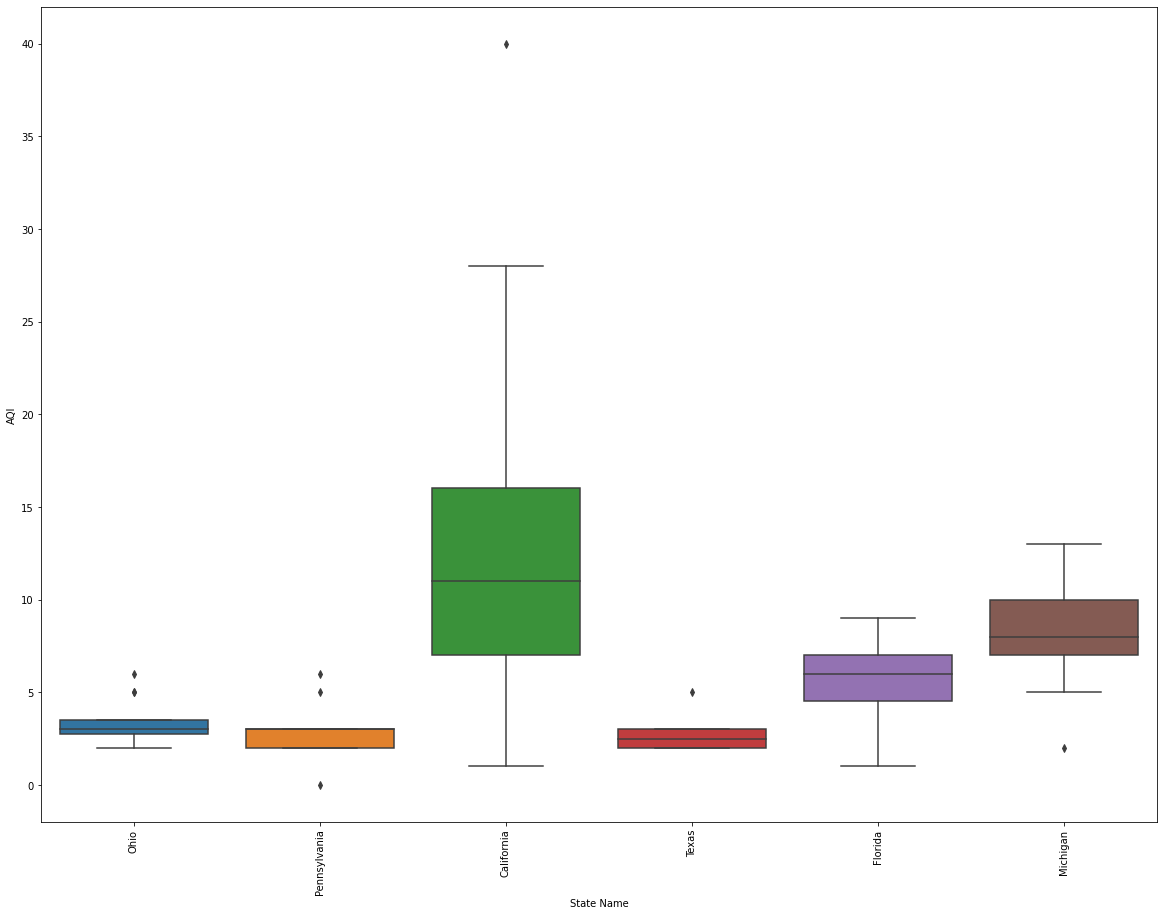

In [13]:
### YOUR CODE HERE ###
plt.figure(figsize=(20,15))
sns.boxplot(x=RRE_aqi['state_name'], y=RRE_aqi['aqi'])
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('AQI')
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

ZY: California as it has a larger spread and a higher max.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [14]:
# Find the mean aqi for your state.

### YOUR CODE HERE ###
aqi_ca = aqi[aqi['state_name']=='California']
sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [15]:
# Input your confidence level here:

### YOUR CODE HERE ###
cl = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [16]:
# Calculate your margin of error.

### YOUR CODE HERE ###

# Begin by identifying the z associated with your chosen confidence level.
z = 1.96

# Next, calculate your standard error.
se = aqi_ca['aqi'].std()/np.sqrt(aqi_ca.shape[0])

# Lastly, use the preceding result to calculate your margin of error.
me = se * z
print(se, me)

0.8987209641127412 1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [17]:
# Calculate your confidence interval (upper and lower limits).

### YOUR CODE HERE ###
ul = sample_mean + me
ll = sample_mean - me
print(ll,ul)

10.359719031551148 13.882705210873095


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [18]:
# Import stats from scipy.

### YOUR CODE HERE ###
from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [19]:
### YOUR CODE HERE ###
stats.norm.interval(alpha=cl, loc=sample_mean, scale=se)

(10.359751399400034, 13.882672843024208)

# Considerations

**What are some key takeaways that you learned from this lab?**

ZY: Doing CI is relatively easy in Python.

**What findings would you share with others?**

ZY: While playing with plt, I noticed that if you were to do consecutive plots on the same data, they would output the same format, even if you tried to change it.

**What would you convey to external stakeholders?**

ZY: 95% confident that the true population parameter for AQI in california lies between 10.35 to 13.88.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.